In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from matplotlib import colors
from direct_optimal_mapping import dom_pspec
from direct_optimal_mapping import image_cube_compilation

%matplotlib notebook

# Map Data Acquisition

The map files were generated by mapping scripts stored in this repository https://github.com/Zhilei/dom_radec <br>
Specifically, the script generated the files below is https://github.com/Zhilei/dom_radec/blob/main/h1c_idr22_mapping_radec_grid_validation.py

In [2]:
freq_idx_start, freq_idx_end = 0, 180
band = 'band2'
val_type = 'true_sum'

map_files_pol1 = sorted(glob('/nfs/ger/home/zhileixu/data/optimal_mapping/h1c_idr22/radec_grid/'+\
                             'validation/%s/data/h1c_idr22_*_*MHz_pol-5_radec_grid_*.p'%(val_type)))
print(len(map_files_pol1), 'files found.')
print('First file:', map_files_pol1[0])
print('Last file:', map_files_pol1[-1])

180 files found.
First file: /nfs/ger/home/zhileixu/data/optimal_mapping/h1c_idr22/radec_grid/validation/true_sum/data/h1c_idr22_true_sum_150.34MHz_pol-5_radec_grid_RA16Dec8.p
Last file: /nfs/ger/home/zhileixu/data/optimal_mapping/h1c_idr22/radec_grid/validation/true_sum/data/h1c_idr22_true_sum_167.84MHz_pol-5_radec_grid_RA16Dec8.p


# Overall Skeleton Procedure

In [3]:
# Set up image cube
img_cube1 = image_cube_compilation.ImgCube(map_files_pol1[freq_idx_start:freq_idx_end],
                                           map_files_pol1[freq_idx_start:freq_idx_end],
                                           )
img_dic1 = img_cube1.image_cube_calc()
p_dic = img_cube1.p_mat_calc()
# Initiate power spectrum calculation
ps_calc = dom_pspec.PS_Calc(img_dic1, par_taper='bh', per_taper='bh')
ps_calc.set_cosmo_grid()

# Power spectrum calculation and normalization
ps_calc.calc_fft(volume='original')
ps_calc.norm_calc(p_dic, norm_data=True)

# Binning to 2D and 1D power spectra
ps_calc.set_k_space(binning='lin')
ps_calc.calc_ps1d(avoid_fg=False, max_kperp=0.04)

# Overall Procedure with Illustrations

In [4]:
img_cube1 = image_cube_compilation.ImgCube(map_files_pol1[freq_idx_start:freq_idx_end],
                                           map_files_pol1[freq_idx_start:freq_idx_end],
                                           )
img_dic1 = img_cube1.image_cube_calc()

print('Image Cube dimension:', img_dic1['data_cube_I'].shape)

Image Cube dimension: (180, 32, 16)


<IPython.core.display.Javascript object>


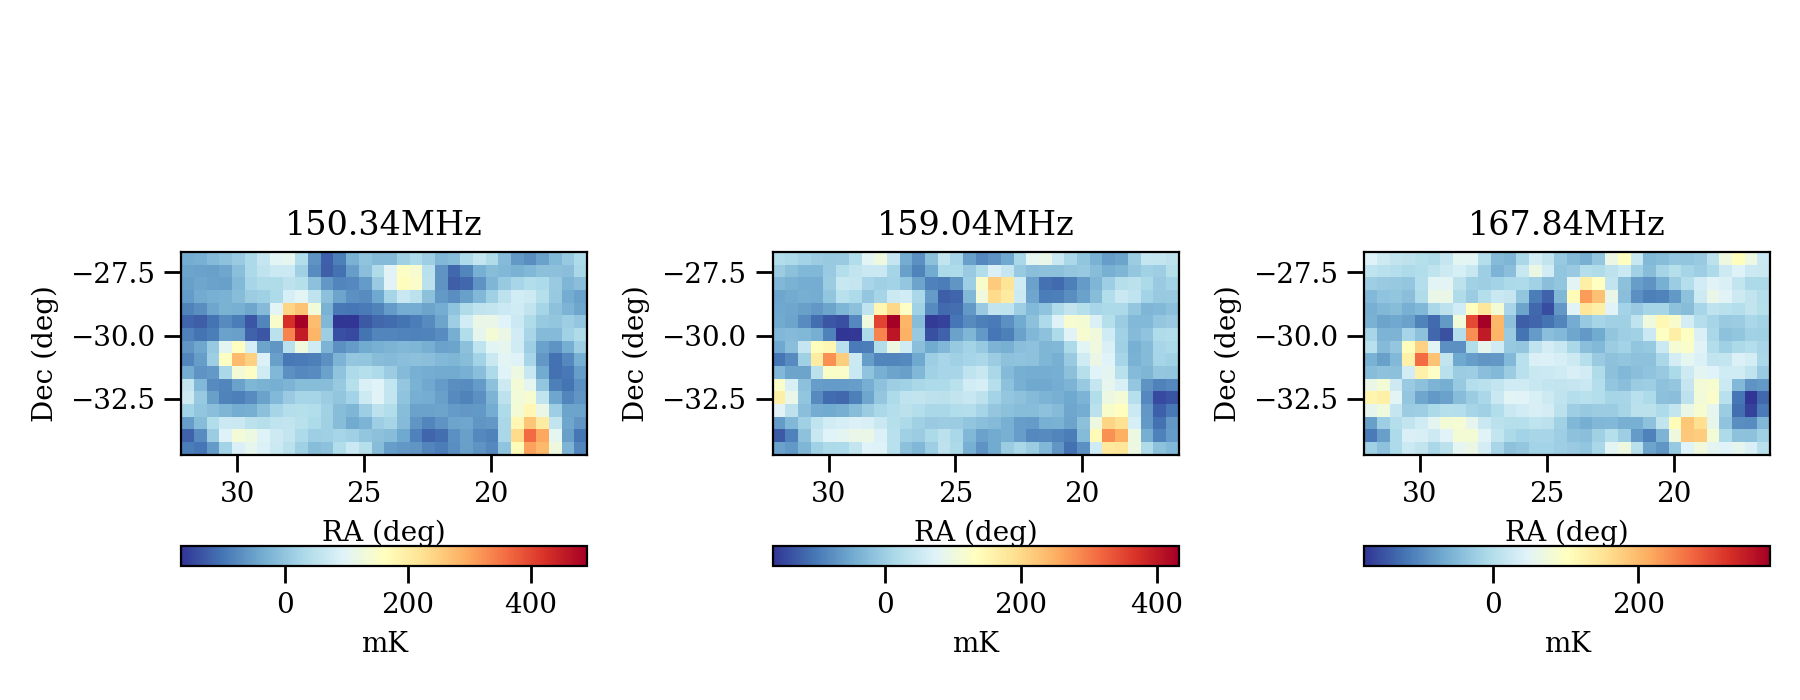

In [5]:
fig, ax = plt.subplots(ncols=3, figsize=(9, 3.5))

i_t = 0
cax = ax[0].pcolormesh(img_dic1['px_dic']['ra_deg'][:, 0], img_dic1['px_dic']['dec_deg'][0], img_dic1['data_cube_I'][i_t].T)
ax[0].set_title('%.2fMHz'%img_dic1['freq_mhz'][i_t])
ax[0].set_xlabel('RA (deg)')
ax[0].set_ylabel('Dec (deg)')
# ax[0].invert_xaxis()
ax[0].set_aspect('equal')
cbar = plt.colorbar(cax, ax=ax[0], orientation='horizontal')
cbar.set_label('mK')
ax[0].invert_xaxis()

i_t = 89
cax = ax[1].pcolormesh(img_dic1['px_dic']['ra_deg'][:, 0], img_dic1['px_dic']['dec_deg'][0], img_dic1['data_cube_I'][i_t].T)
ax[1].set_title('%.2fMHz'%img_dic1['freq_mhz'][i_t])
ax[1].set_xlabel('RA (deg)')
ax[1].set_ylabel('Dec (deg)')
# ax[1].invert_xaxis()
ax[1].set_aspect('equal')
cbar = plt.colorbar(cax, ax=ax[1], orientation='horizontal')
cbar.set_label('mK')
ax[1].invert_xaxis()

i_t = -1
cax = ax[2].pcolormesh(img_dic1['px_dic']['ra_deg'][:, 0], img_dic1['px_dic']['dec_deg'][0], img_dic1['data_cube_I'][i_t].T)
ax[2].set_title('%.2fMHz'%img_dic1['freq_mhz'][i_t])
ax[2].set_xlabel('RA (deg)')
ax[2].set_ylabel('Dec (deg)')
# ax[2].invert_xaxis()
ax[2].set_aspect('equal')
cbar = plt.colorbar(cax, ax=ax[2], orientation='horizontal')
cbar.set_label('mK')
ax[2].invert_xaxis()

plt.tight_layout()

In [6]:
ps_calc = dom_pspec.PS_Calc(img_dic1, par_taper='bh', per_taper='bh')

<IPython.core.display.Javascript object>


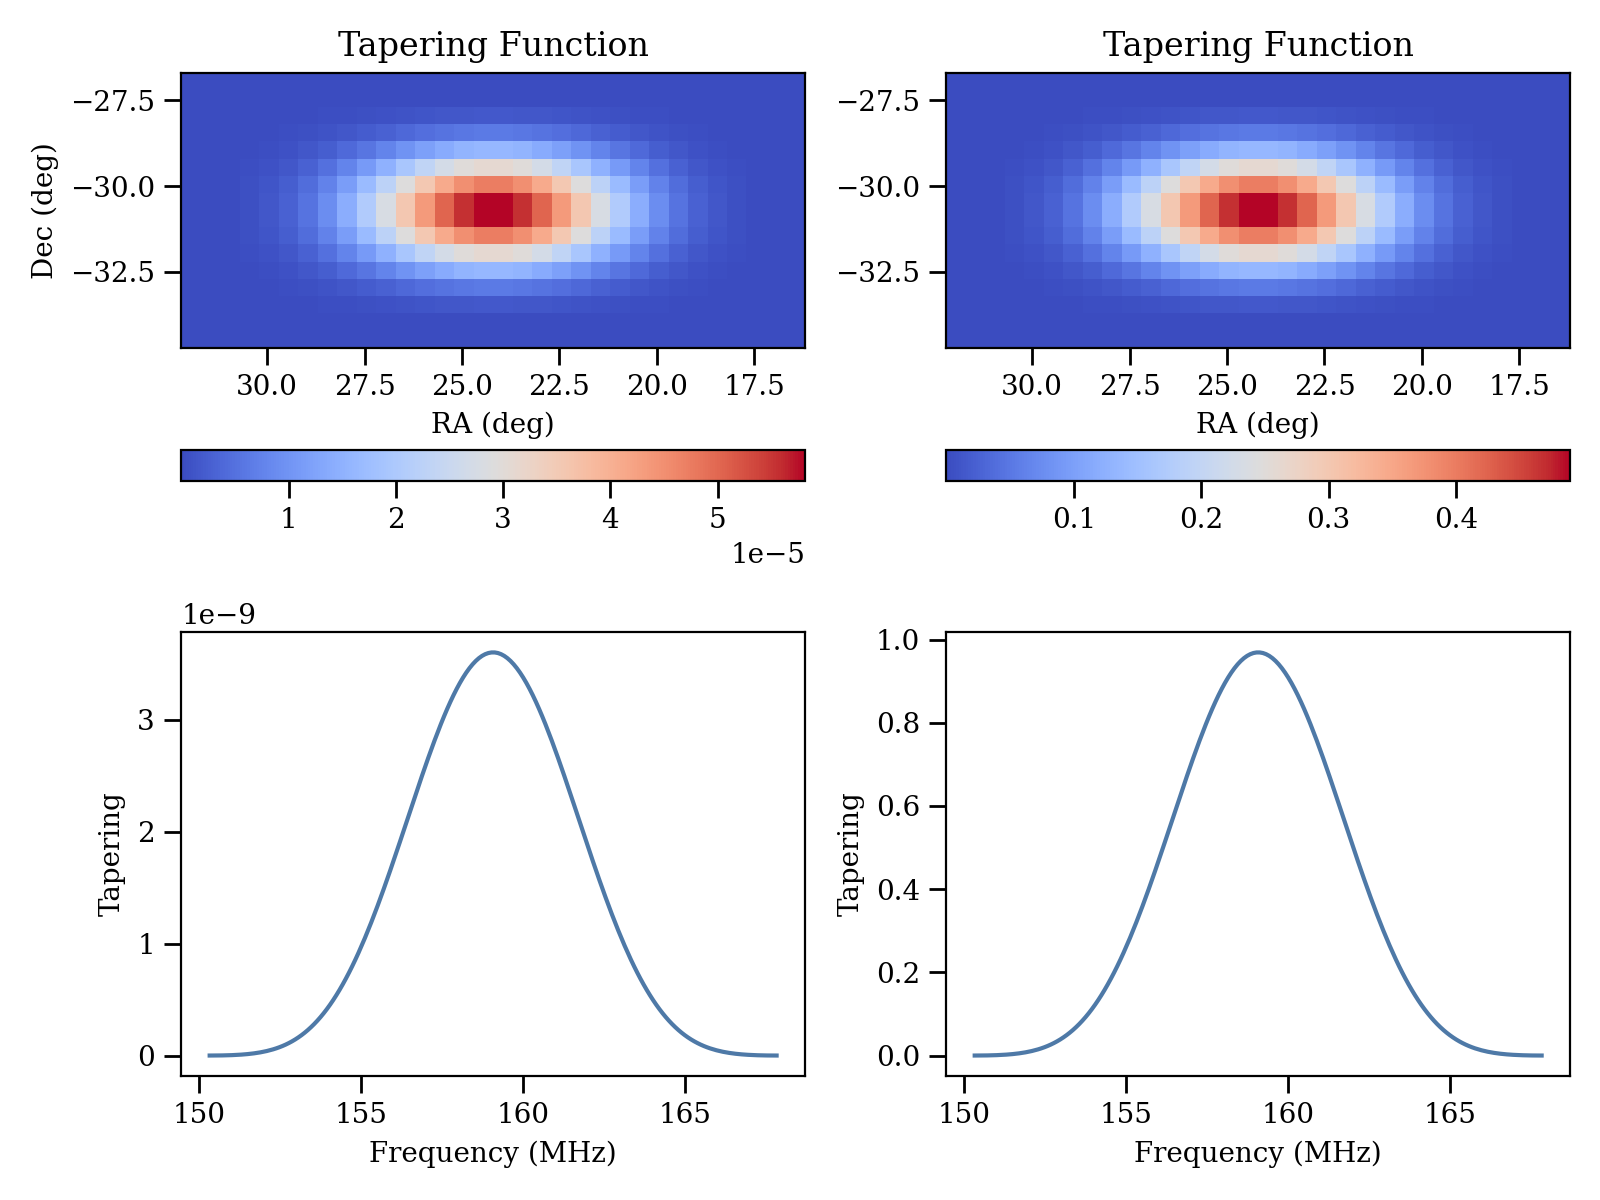

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(8, 6))
ax = ax.flatten()
ifreq = 0
cb_range = 30
ax_t = ax[0]
cax = ax_t.pcolormesh(img_dic1['px_dic']['ra_deg'][:, 0], img_dic1['px_dic']['dec_deg'][0], 
                      ps_calc.taper_3d[ifreq].T,
                      #vmin=-cb_range, vmax=cb_range, 
                      cmap='coolwarm')
ax_t.set_title('Tapering Function')
ax_t.set_xlabel('RA (deg)')
ax_t.set_ylabel('Dec (deg)')
cbar = plt.colorbar(cax, ax=ax_t, orientation='horizontal', pad=0.23)
ax_t.invert_xaxis()

ax_t = ax[1]
cax = ax_t.pcolormesh(img_dic1['px_dic']['ra_deg'][:, 0], img_dic1['px_dic']['dec_deg'][0], 
                      ps_calc.taper_3d[ifreq+59].T,
                      #vmin=-cb_range, vmax=cb_range, 
                      cmap='coolwarm')
ax_t.set_title('Tapering Function')
ax_t.set_xlabel('RA (deg)')
cbar = plt.colorbar(cax, ax=ax_t, orientation='horizontal', pad=0.23)
ax_t.invert_xaxis()

ax_t = ax[2]
ax_t.plot(img_dic1['freq_mhz'], ps_calc.taper_3d[:, 0, 0])
ax_t.set_xlabel('Frequency (MHz)')
ax_t.set_ylabel('Tapering')

ax_t = ax[3]
ax_t.plot(img_dic1['freq_mhz'], ps_calc.taper_3d[:, 15, 7])
ax_t.set_xlabel('Frequency (MHz)')
ax_t.set_ylabel('Tapering')

plt.tight_layout()

<IPython.core.display.Javascript object>


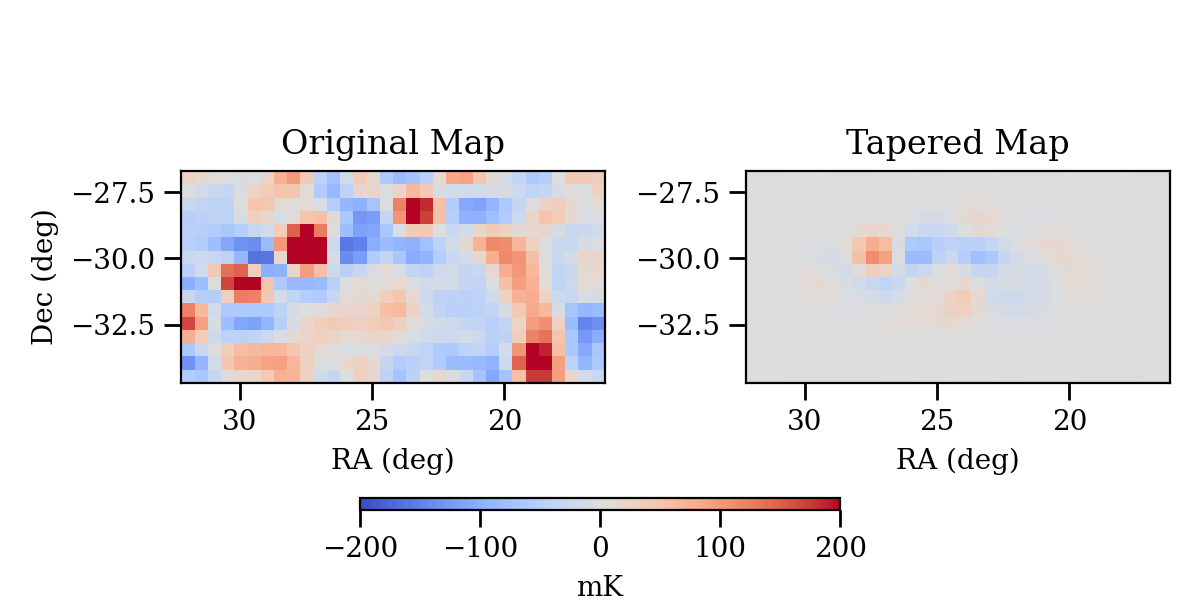

159.2375366568915 MHz


/tmp/ipykernel_4288/3190064089.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(6, 3))
ifreq = 91
cb_range = 200
cb_zoom_factor = 1

print(img_dic1['freq_mhz'][ifreq], 'MHz')

ax_t = ax[0]
cax = ax_t.pcolormesh(img_dic1['px_dic']['ra_deg'][:, 0], img_dic1['px_dic']['dec_deg'][0], img_dic1['data_cube_I'][ifreq].T,
                      vmin=-cb_range, vmax=cb_range, 
                      cmap='coolwarm')
ax_t.set_title(r'Original Map')
ax_t.set_xlabel('RA (deg)')
ax_t.set_ylabel('Dec (deg)')
# cbar = plt.colorbar(cax, ax=ax_t, orientation='horizontal', pad=0.23)
# cbar.set_label('mK')
ax_t.set_aspect('equal')
ax_t.invert_xaxis()


map_tp = img_dic1['data_cube_I'][ifreq] * ps_calc.taper_3d[ifreq]
ax_t = ax[1]
cax = ax_t.pcolormesh(img_dic1['px_dic']['ra_deg'][:, 0], img_dic1['px_dic']['dec_deg'][0], map_tp.T,
                      vmin=-cb_range/cb_zoom_factor, vmax=cb_range/cb_zoom_factor, 
                      cmap='coolwarm')
ax_t.set_title(r'Tapered Map')
ax_t.set_xlabel('RA (deg)')
# ax_t.set_ylabel('Dec (deg)')
ax_t.set_aspect('equal')
ax_t.invert_xaxis()

fig.subplots_adjust(hspace=0, top=0.97, left=0.0, bottom=0.4)
cbar_ax = fig.add_axes([0.30, 0.15, 0.4, 0.02])
cbar = fig.colorbar(cax, cax=cbar_ax, orientation='horizontal')
# cbar = plt.colorbar(cax, ax=cbar_ax, orientation='horizontal', pad=0.23)
cbar.set_label('mK')

plt.tight_layout()

In [9]:
ps_calc.set_cosmo_grid()

print('Frequency (MHz) range:', np.ptp(ps_calc.freq_mhz))
print('LOS Distance (Mpc/h):', ps_calc.dist_cm_h[0], '+', np.ptp(ps_calc.dist_cm_h))
print('Distances changes (fractional) by:', (ps_calc.dist_cm_h[0]-ps_calc.dist_cm_h[-1])/np.mean(ps_calc.dist_cm_h))
dist_intvl = -np.diff(ps_calc.dist_cm_h)
print('LOS Distance Interval (Mpc/h):', dist_intvl[0], '+', np.ptp(dist_intvl))
print('Distance Interval changes (fractional) by:', (dist_intvl[-1]-dist_intvl[0])/np.mean(dist_intvl))

print('Perpendicular to LOS distances range:', np.radians(16)*np.mean(ps_calc.dist_cm_h))
print('Perpendicular to LOS distances resol:', np.radians(0.5)*np.mean(ps_calc.dist_cm_h))

print('Voxel size (avg):', ps_calc.res_x_mpch * ps_calc.res_y_mpch * ps_calc.res_z_mpch, '(Mpc/h)^3')

Frequency (MHz) range: 17.49755620723363
LOS Distance (Mpc/h): 6448.695365119297 Mpc / littleh + 205.60106181625724 Mpc / littleh
Distances changes (fractional) by: 0.032403890329847515
LOS Distance Interval (Mpc/h): 1.181150265713768 Mpc / littleh + 0.06339133737310476 Mpc / littleh
Distance Interval changes (fractional) by: -0.05518964391305746
Perpendicular to LOS distances range: 1771.8442756163806 Mpc / littleh
Perpendicular to LOS distances resol: 55.370133613011895 Mpc / littleh
Voxel size (avg): 3521.4657214253593 (Mpc/h)^3


<IPython.core.display.Javascript object>


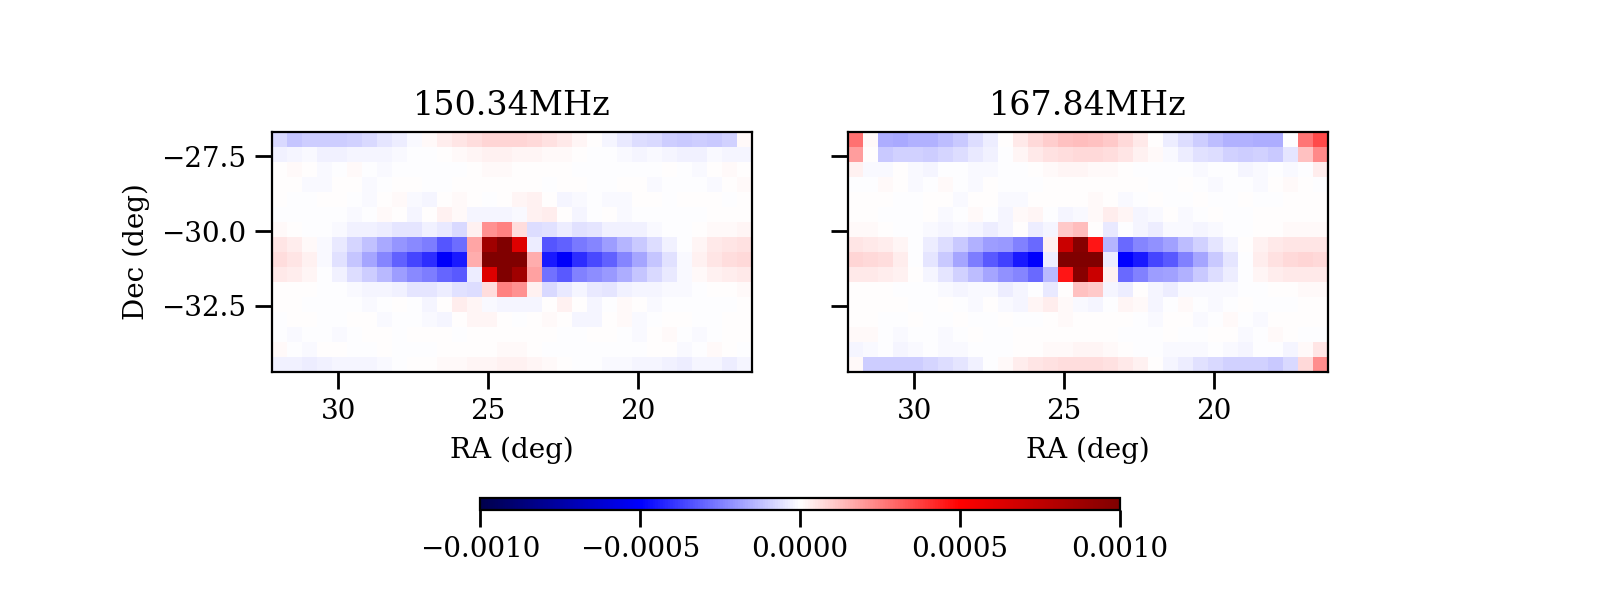

/tmp/ipykernel_4288/3852633699.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [10]:
shape = np.array((ps_calc.nz, ps_calc.nx, ps_calc.ny))
p_dic = img_cube1.p_mat_calc()

fig = plt.figure(figsize=(8, 3))

ax_t = fig.add_axes([0.17, 0.33, 0.3, 0.5])
ifreq = 0
ipx = 263
cb_pad = 0.2
vmin = -1e-3
vmax = 1e-3
cax = ax_t.pcolormesh(p_dic['px_dic']['ra_deg'][:, 0], p_dic['px_dic']['dec_deg'][0],  p_dic['p_mat_I'][ifreq, ipx, :].reshape(shape[1:]).T, 
               cmap='seismic', 
                      vmin=vmin, vmax=vmax
                     )
ax_t.set_xlabel('RA (deg)')
ax_t.set_ylabel('Dec (deg)')
ax_t.set_aspect('equal')
ax_t.set_title('%.2fMHz'%img_dic1['freq_mhz'][ifreq])
ax_t.invert_xaxis()

ax_t = fig.add_axes([0.53, 0.33, 0.3, 0.5])
ifreq = -1
cax = ax_t.pcolormesh(p_dic['px_dic']['ra_deg'][:, 0], p_dic['px_dic']['dec_deg'][0],  p_dic['p_mat_I'][ifreq, ipx, :].reshape(shape[1:]).T, 
               cmap='seismic', 
                      vmin=vmin, vmax=vmax
                     )

ax_t.set_xlabel('RA (deg)')
ax_t.set_aspect('equal')
ax_t.set_title('%.2fMHz'%img_dic1['freq_mhz'][ifreq])
ax_t.invert_xaxis()
ax_t.set_yticklabels([])

ax_t = fig.add_axes([0.3, 0.15, 0.4, 0.02])
fig.colorbar(cax, cax=ax_t, orientation='horizontal')

plt.tight_layout()

In [11]:
ps_calc.calc_fft(volume='original')
ps_calc.norm_calc(p_dic, norm_data=True)
ps_calc.set_k_space(binning='lin')
ps_calc.calc_ps1d(avoid_fg=False, max_kperp=0.04)

In [12]:
x_lim = [5e-3, 4e-2]
y_lim = [1.5e-2, 2.5]
cmap_min = 1e6
cmap_max = 1e14

from astropy.cosmology import WMAP9 as cosmo
import hera_pspec.conversions as conversions
cos_conversion = conversions.Cosmo_Conversions(Om_L=cosmo.Ode0, Om_b=cosmo.Ob0, Om_c=cosmo.Odm0, H0=cosmo.H0.value)
z_avg = np.mean(ps_calc.redshift)

def bl2kperp(x, z=z_avg):
    return cos_conversion.bl_to_kperp(z) * x
def kperp2bl(x, z=z_avg):
    return x/cos_conversion.bl_to_kperp(z)

def tau2kpara(x, z=z_avg):
    return cos_conversion.tau_to_kpara(z_avg) * x*1e-9
def kpara2tau(x, z=z_avg):
    return x*1e9/cos_conversion.tau_to_kpara(z_avg)

<IPython.core.display.Javascript object>


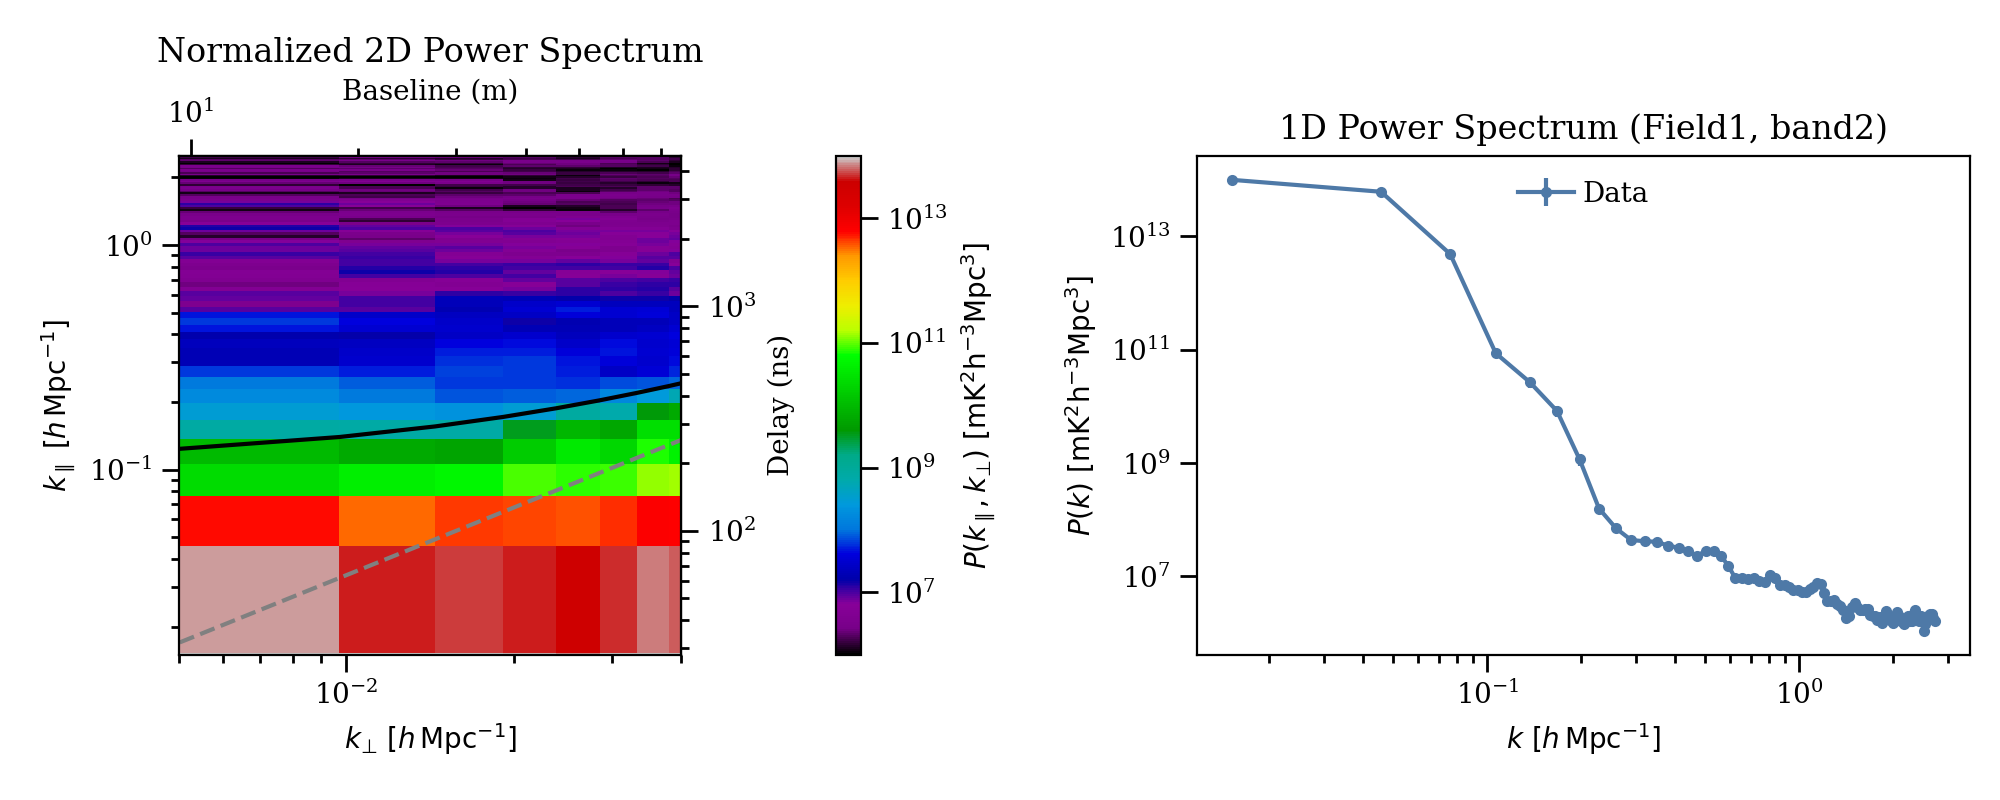

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

ax_t = ax[0]

cax = ax_t.pcolormesh(ps_calc.k_perp, ps_calc.k_para, ps_calc.ps2d.T, 
                      norm=colors.LogNorm(vmax=cmap_max, vmin=cmap_min), cmap='nipy_spectral')
ax_t.set_xlabel(r'$k_\bot$ $[h\, \mathrm{Mpc}^{-1}]$')
ax_t.set_ylabel(r'$k_\parallel$ $[h\, \mathrm{Mpc}^{-1}]$')
ax_t.set_title('Normalized 2D Power Spectrum')
ax_t.set_xscale('log')
ax_t.set_xlim(x_lim)
ax_t.set_yscale('log')
ax_t.set_ylim(y_lim)
cbar = plt.colorbar(cax, ax=ax_t, orientation='vertical', pad=0.2)
cbar.set_label(r'$P(k_\parallel, k_\bot)\ [\mathrm{mK}^2 \mathrm{h}^{-3} \mathrm{Mpc}^3]$')
ax_t.plot(ps_calc.k_perp_edge, ps_calc.slope*ps_calc.k_perp_edge, c='grey', ls='--')
ax_t.plot(ps_calc.k_perp_edge, ps_calc.slope*ps_calc.k_perp_edge + ps_calc.y_intercept, c='k')

secxax = ax_t.secondary_xaxis('top', functions=(kperp2bl, bl2kperp))
secxax.set_xlabel('Baseline (m)', labelpad=0)
secyax = ax_t.secondary_yaxis('right', functions=(kpara2tau, tau2kpara))
secyax.set_ylabel('Delay (ns)')

ax_t.set_xticklabels([], minor=True)
secxax.set_xticklabels([], minor=True)

ax_t = ax[1]
ax_t.errorbar(ps_calc.kr, ps_calc.ps1d, 
             yerr=ps_calc.ps1d_std/np.sqrt(ps_calc.ps1d_nsample), 
#              yerr=ps_calc.ps1d_std, 
             fmt='.-', label=r'Data')
ax_t.set_yscale('log')
plt.xscale('log')
ax_t.set_xlabel('$k\ [h\, \mathrm{Mpc}^{-1}]$')
ax_t.set_ylabel(r'$P(k)\ [\mathrm{mK}^2 \mathrm{h}^{-3} \mathrm{Mpc}^3]$')
ax_t.set_title('1D Power Spectrum (Field1, %s)'%band)

ax_t.legend(loc=9)

plt.tight_layout()